In [1]:
import pandas as pd
import matplotlib.pyplot as plot 
import numpy as np

In [2]:
Crime_Data = pd.read_csv("merged_df.csv")
Crime_Data.head()

,Unnamed: 0,Date,occurrencedayofweek,occurrencehour,MCI,Lat,Long,Month_,Mean_temp,Total_Precip,Season,Rain,Snow
0,0,2014-01-09,Thursday,11,Break and Enter,43.646061,-79.531,1,-11.0,0.0,Winter,No,No
1,1,2014-01-16,Thursday,0,Assault,43.663498,-79.462,1,-3.0,2.0,Winter,No,Yes
2,2,2014-01-16,Thursday,2,Assault,43.657040,-79.381,1,-3.0,2.0,Winter,No,Yes
3,3,2014-01-16,Thursday,17,Break and Enter,43.744343,-79.214,1,-3.0,2.0,Winter,No,Yes
4,4,2014-01-16,Thursday,19,Robbery,43.748562,-79.559,1,-3.0,2.0,Winter,No,Yes


In [14]:
Crime_Data['occurrencedayofweek'] = Crime_Data['occurrencedayofweek'].apply(lambda x: x.strip())

In [16]:
days_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [15]:
Week = Crime_Data.groupby(["occurrencedayofweek","MCI"])["Date"].count().unstack()
Week

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
occurrencedayofweek,,,,,
Friday,12645,2674,5701,2741,887
Monday,11972,2429,4866,2345,752
Saturday,14114,2516,4355,2704,681
Sunday,14283,2295,3940,2405,610
Thursday,11883,2554,5105,2444,773
Tuesday,11429,2476,4870,2478,736
Wednesday,11897,2465,4849,2475,747


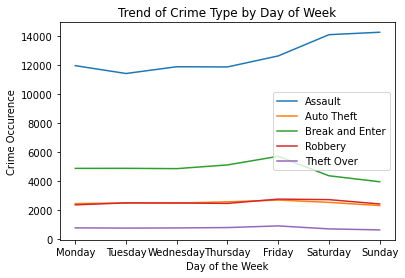

In [19]:
Week.groupby(['occurrencedayofweek']).sum().reindex(days_sort).plot()
plot.xlabel("Day of the Week")
plot.ylabel("Crime Occurence")
plot.title("Trend of Crime Type by Day of Week")
plot.legend()
plot.savefig("images/WeeklyCrime.jpeg")

In [4]:
Month = Crime_Data.groupby(["Month_","MCI"])["Date"].count().unstack()
Month

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Month_,,,,,
1,6768,1217,2723,1398,369
2,6460,1185,2485,1314,371
3,7055,1455,2747,1442,379
4,7445,1388,2732,1429,424
5,8219,1470,2798,1597,493
6,7995,1539,2941,1513,478
7,8141,1628,2861,1599,468
8,7822,1674,3067,1513,467
9,7821,1563,2981,1512,484


In [5]:
Mean_Temp = Crime_Data.groupby(["Mean_temp","MCI"])["Date"].count().unstack()
Mean_Temp

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Mean_temp,,,,,
-22.0,47,10,12,6,2
-21.0,55,8,13,13,1
-20.0,52,15,16,4,3
-19.0,199,37,98,38,14
-18.0,135,26,65,26,6
-17.0,69,11,32,7,6
-16.0,188,38,91,68,10
-15.0,282,27,68,48,22
-14.0,505,111,237,112,30


In [6]:
Hour = Crime_Data.groupby(["occurrencehour","MCI"])["Date"].count().unstack()
Hour

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
occurrencehour,,,,,
0,5515,1129,2253,974,532
1,4014,535,1340,928,114
2,4398,405,1356,815,73
3,2757,291,1452,667,64
4,1670,247,1391,411,58
5,1198,264,1104,244,46
6,1169,304,858,225,58
7,1597,445,1030,159,97
8,2462,501,1618,194,138


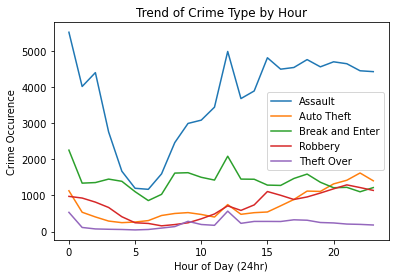

In [7]:
Hour.plot()
plot.xlabel("Hour of Day (24hr)")
plot.ylabel("Crime Occurence")
plot.title("Trend of Crime Type by Hour")
plot.legend()
plot.savefig("images/HourlyCrime.jpeg")

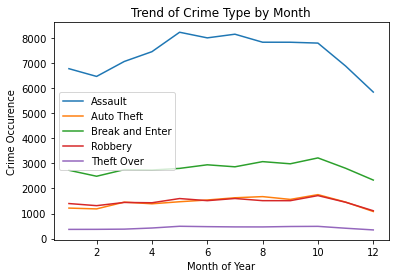

In [8]:
Month.plot()
plot.xlabel("Month of Year")
plot.ylabel("Crime Occurence")
plot.title("Trend of Crime Type by Month")
plot.legend()
plot.savefig("images/MonthlyCrime.jpeg")

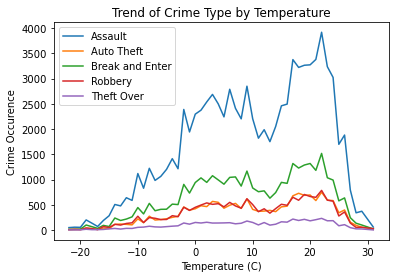

In [9]:
Mean_Temp.plot()
plot.xlabel("Temperature (C)")
plot.ylabel("Crime Occurence")
plot.title("Trend of Crime Type by Temperature")
plot.legend()
plot.savefig("images/TemperatureCrime.jpeg")